In [2]:
import numpy as np

def f(x):
    coef = [1, 2, 3, 4, 5]
    return np.polyval(coef, x)

f(4)

453

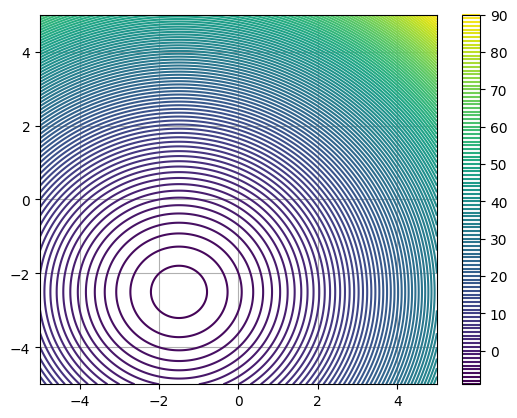

In [9]:
# draw the contour plot
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 1000)
y = np.linspace(-5, 5, 1000)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2 + 3*X + 5*Y
plt.contour(X, Y, Z, levels=100) # 等高線分 100 層
plt.colorbar()
plt.grid()
plt.show()

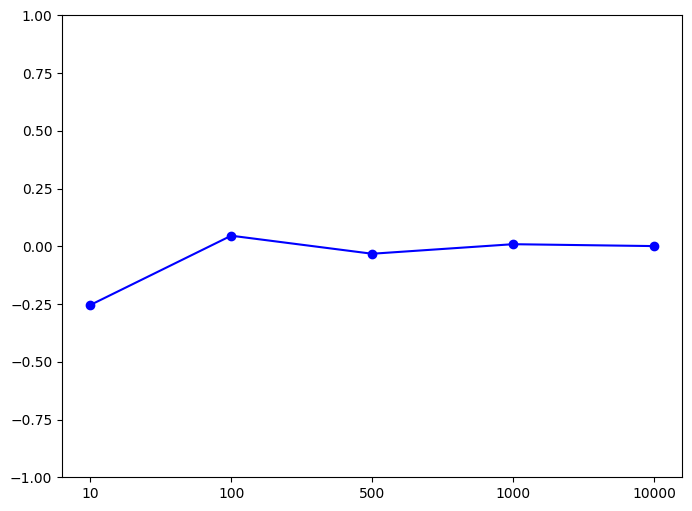

In [1]:
# plot the average vs N
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mu = 0
s = 1
N_values = [10, 100, 500, 1000, 10000]
averages = []
for N in N_values:
    x = norm.rvs(0, 1, N)
    averages.append(np.mean(x))

fig, ax = plt.subplots(figsize=(8, 6)) 
ax.plot(averages, marker='o', linestyle='-', color='b')
ax.set_xticks(np.arange(len(N_values)))
ax.set_xticklabels(N_values)
ax.set_ylim([-1, 1])

plt.show()

雙變量

C:\Users\Sheng\AppData\Local\Temp\ipykernel_8996\3578537062.py:8: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))


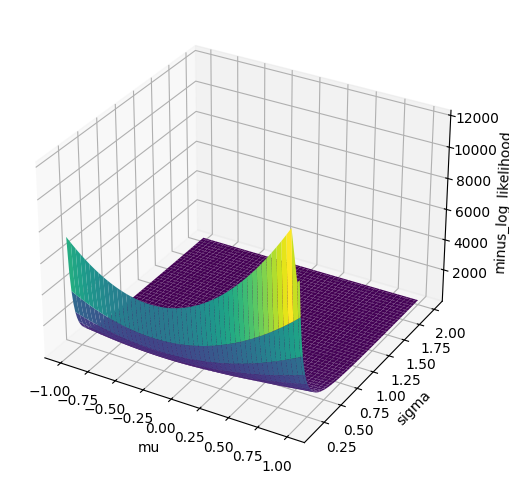

In [26]:
from scipy.stats import norm

N = 100
x = norm.rvs(0, 1, N)

# 定義出對數似然函數
def log_likelihood(x, mu, sigma):
    return np.sum(np.log(norm.pdf(x, loc = mu, scale = sigma)))

# 定義出負對數似然函數
def minus_log_likelihood(mu, sigma):
    return -log_likelihood(x, mu, sigma)

# 畫出 3D 圖形
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

mu = np.linspace(-1, 1, 100)
sigma = np.linspace(0.1, 2, 100)
MU, SIGMA = np.meshgrid(mu, sigma)
# 計算每個 (mu, sigma) 對應的 minus_log_likelihood
Z = np.array([[minus_log_likelihood(mu, sigma) for mu in mu] for sigma in sigma])

ax.plot_surface(MU, SIGMA, Z, cmap='viridis')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('minus_log_likelihood')
plt.show()